# Merging Clean Datasets

In [1]:
import pandas as pd
import seaborn as sns

In [6]:
# import all the df

rainfall = pd.read_csv("../01_exploratory_data_analysis/rainfall/dataset_rainfall.csv")
unemp = pd.read_csv("gdp_unemployment/gdppcap unemp and gini.csv")
protest = pd.read_csv("protests/yearly_protest_data.csv")

In [7]:
rainfall.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff'],
      dtype='object')

In [8]:
rainfall = rainfall.drop('Unnamed: 0', axis=1)

rainfall.country.nunique()

136

In [9]:
unemp = unemp.drop (['Unnamed: 0', 'pop'], axis=1)
unemp.country.nunique()

191

In [10]:
protest = protest.drop('Unnamed: 0', axis = 1)
protest = protest.rename(columns= {'year':'Year'})
protest.country.nunique()

136

In [11]:
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df

,country_unemp,ISO3_code,country_rain,b_equal
0,Afghanistan,AFG,Afghanistan,True
1,Afghanistan,AFG,Afghanistan,True
2,Afghanistan,AFG,Afghanistan,True
3,Afghanistan,AFG,Afghanistan,True
4,Afghanistan,AFG,Afghanistan,True
...,...,...,...,...
560891,Zimbabwe,ZWE,Zimbabwe,True
560892,Zimbabwe,ZWE,Zimbabwe,True
560893,Zimbabwe,ZWE,Zimbabwe,True
560894,Zimbabwe,ZWE,Zimbabwe,True


In [12]:
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array([], dtype=object)

In [13]:
#USA and Korea are diff in rainfall and unemp - change to rainfall names
unemp.loc[unemp['country']=='United States', 'country']='United States of America'
unemp.loc[unemp['country']=='South Korea', 'country']= 'Republic of Korea'

#repeat step above to check
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array([], dtype=object)

In [14]:
# merging rainfall and gdp data - limited by the rainfall data
df = rainfall.merge(unemp, on= ['ISO3_code', 'Year', 'country'], how='inner')

In [15]:
df.country.nunique()

136

In [18]:
df.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'gdp_percap', 'gdp_percap_pchange', 'gdp_pchange',
       'unemp_rate', 'unemp_rate_pchange', 'gini', 'gini_pchange'],
      dtype='object')

In [19]:
df= df.sort_values(by=['country', 'Year'])
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'M

In [20]:
protest = protest.sort_values(by=['country', 'Year'])
protest.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'M

In [21]:
fulldf = df.merge(protest, on = ['country', 'Year'], how='outer')
fulldf.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'gdp_percap', 'gdp_percap_pchange', 'gdp_pchange',
       'unemp_rate', 'unemp_rate_pchange', 'gini', 'gini_pchange',
       'population', 'participants', 'protest_fraction'],
      dtype='object')

In [22]:
fulldf.sample(10)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,yearly_avg_rainfall,...,gdp_percap,gdp_percap_pchange,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
590,NaN,2003,NaN,NaN,NaN,NaN,Bahrain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764517.0,2000.0,2.616031e-03
1010,BWA,1986,5.286790,0.000000,6.0,3.269283e+09,Botswana,0.463,21.7,314.265403,...,10520.9400,0.000000,8.172926,13.820,0.000000,0.585740,8.046224,NaN,NaN,NaN
8444,TUR,1991,15.247076,0.152279,9.0,2.908192e+11,Turkey,0.328,10.8,518.591972,...,11999.2900,-1.036286,0.720275,8.210,26.404927,0.412846,0.000000,NaN,NaN,NaN
354,ARM,1983,18.434763,0.000000,-7.0,2.737000e+09,Armenia,0.137,7.7,534.722222,...,2958.8804,0.000000,0.000000,1.600,0.000000,0.315673,0.000000,NaN,NaN,NaN
8632,UKR,1987,20.763023,0.663711,-7.0,1.618459e+11,Ukraine,0.430,6.6,432.919345,...,9646.0550,0.000000,145.423484,1.900,0.000000,0.276072,0.000000,NaN,NaN,NaN
4053,IRL,1976,5.580191,0.000000,10.0,4.691124e+10,Ireland,0.091,9.7,825.408046,...,29444.5640,0.000000,1.394811,3.684,0.000000,0.327748,0.000000,NaN,NaN,NaN
6442,PRY,1967,32.896240,0.000000,-8.0,4.045654e+09,Paraguay,0.113,24.2,803.907210,...,9610.7480,0.000000,9.150367,3.400,0.000000,0.500585,0.000000,NaN,NaN,NaN
5226,MLI,1965,61.717617,0.000000,-7.0,2.003673e+09,Mali,0.847,28.1,299.323016,...,1473.7943,0.000000,0.000000,1.206,0.000000,0.389342,0.000000,NaN,NaN,NaN
3875,IDN,1990,21.548723,9.919457,-7.0,2.699151e+11,Indonesia,0.777,26.1,2169.425173,...,4873.0537,0.000000,7.242130,2.617,0.000000,0.310693,-7.958971,183501098.0,100.0,5.449559e-07
8867,UZB,1963,37.093193,0.356802,-7.0,2.604260e+10,Uzbekistan,0.462,13.1,198.676829,...,3046.5637,0.000000,0.000000,1.900,0.000000,0.359525,0.000000,NaN,NaN,NaN


In [23]:
fulldf.to_csv("merged_df.csv")

In [24]:
fulldf.head(15)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,yearly_avg_rainfall,...,gdp_percap,gdp_percap_pchange,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
0,AFG,1960,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.586,11.9,318.565807,...,1454.1108,NaN,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1961,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.588,12.3,294.653108,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
2,AFG,1962,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.591,12.0,243.503638,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
3,AFG,1963,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.593,12.8,307.702050,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
4,AFG,1964,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.596,11.3,300.362434,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
5,AFG,1965,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.598,12.2,320.094246,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
6,AFG,1966,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.601,12.5,267.692460,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
7,AFG,1967,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.606,11.9,330.657077,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
8,AFG,1968,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.610,12.0,315.201058,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
9,AFG,1969,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.615,11.6,331.842262,...,1454.1108,0.0,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN


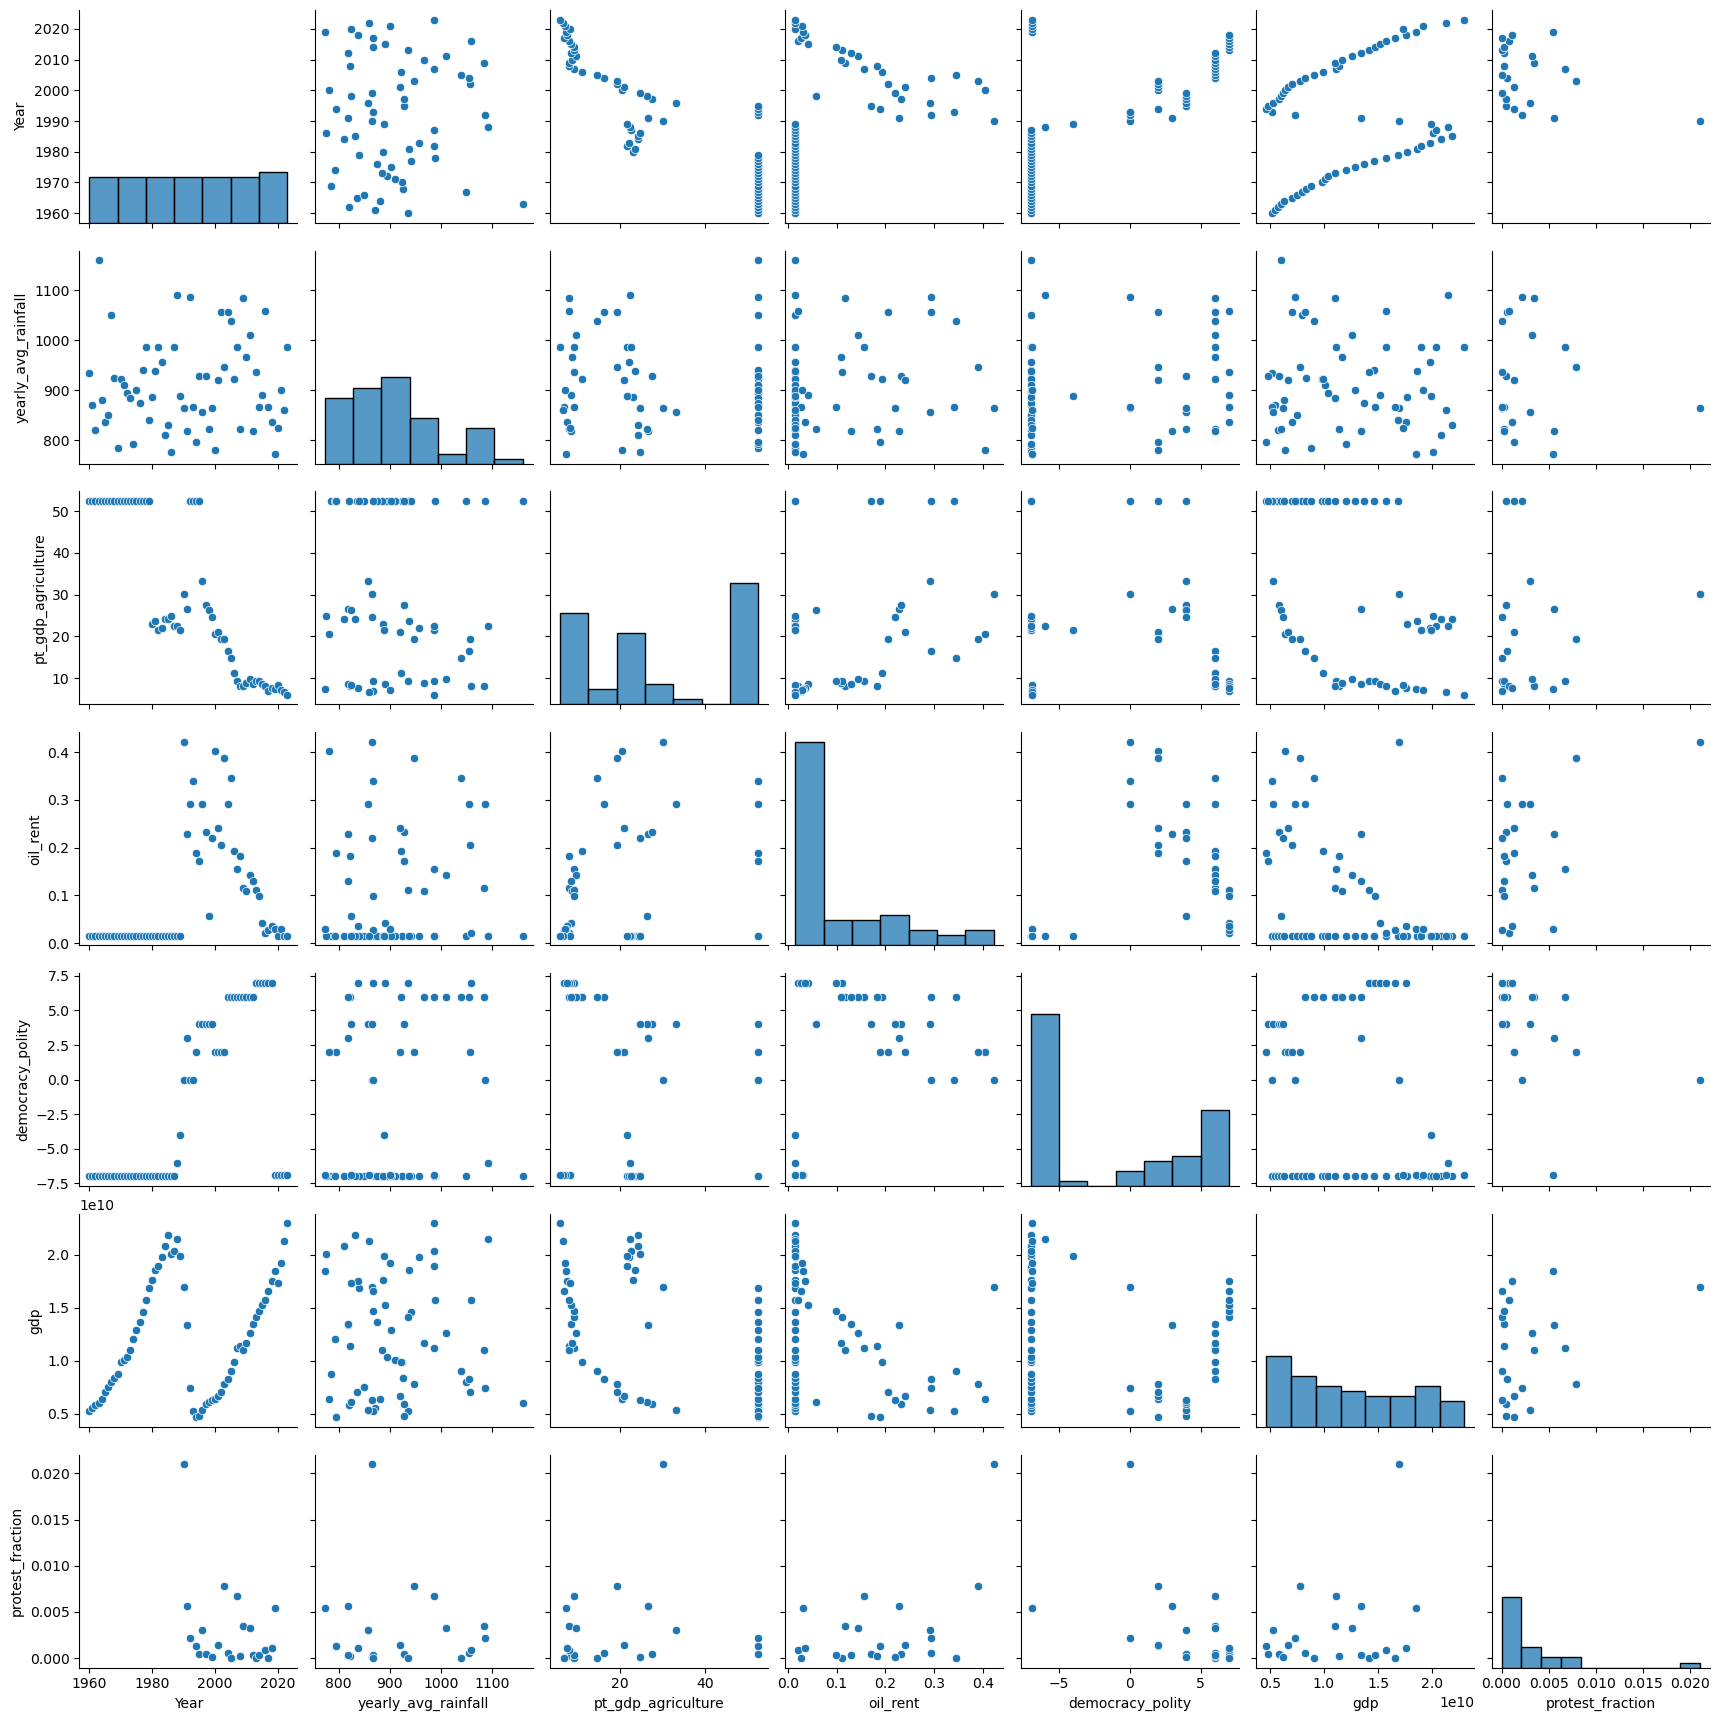

In [25]:
georgia = fulldf[fulldf['country'] == 'Georgia']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(georgia[feats])

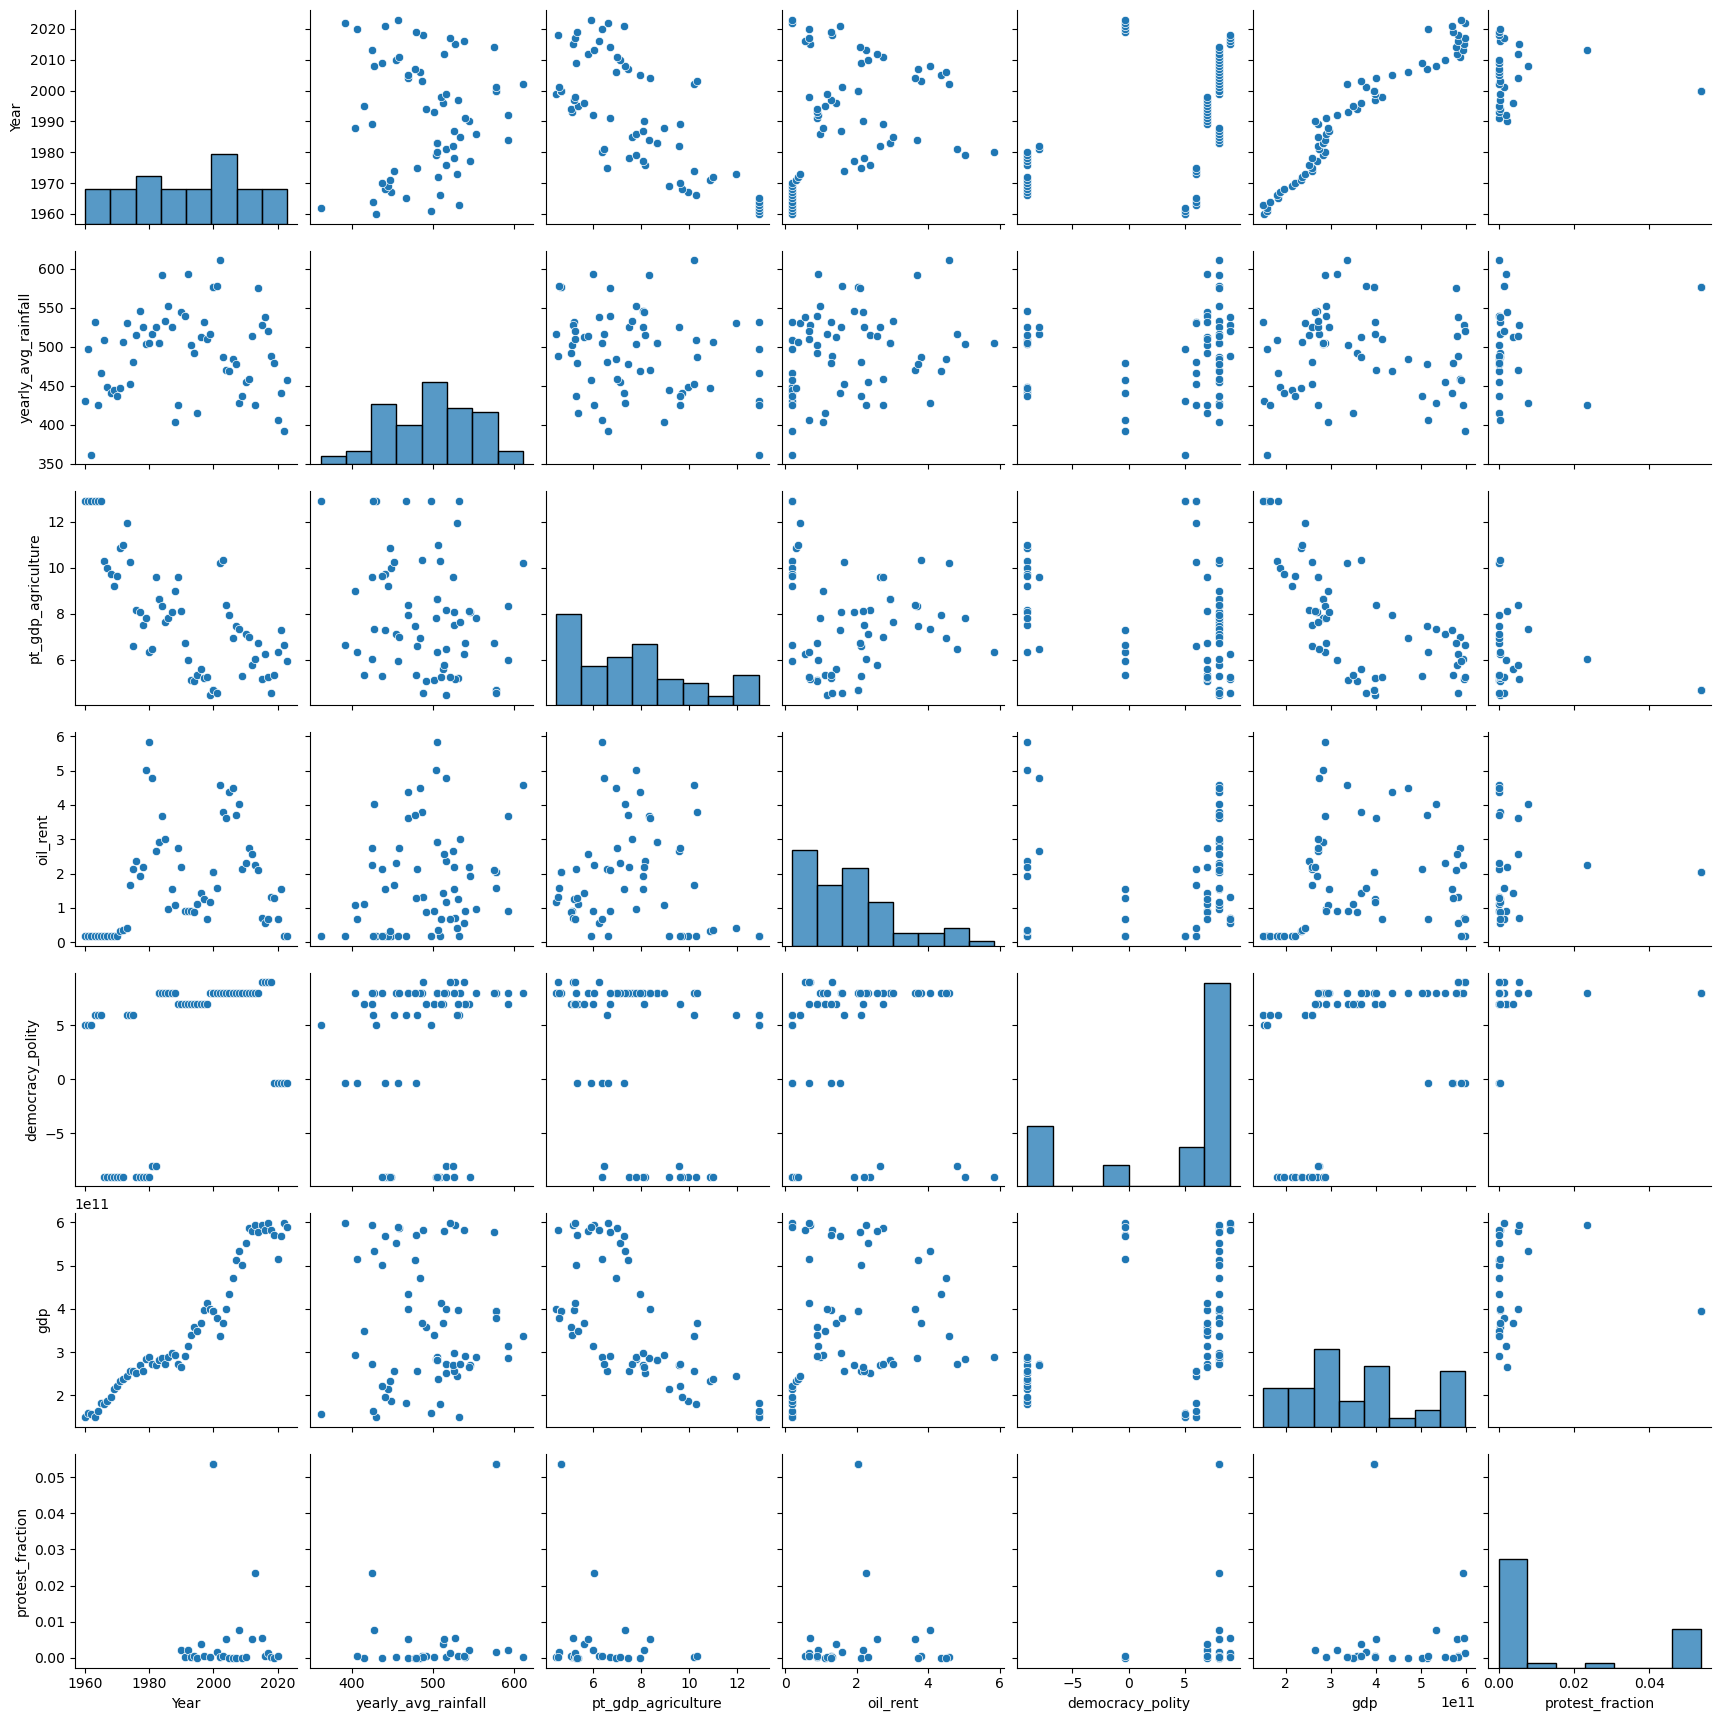

In [26]:
country = fulldf[fulldf['country'] == 'Argentina']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

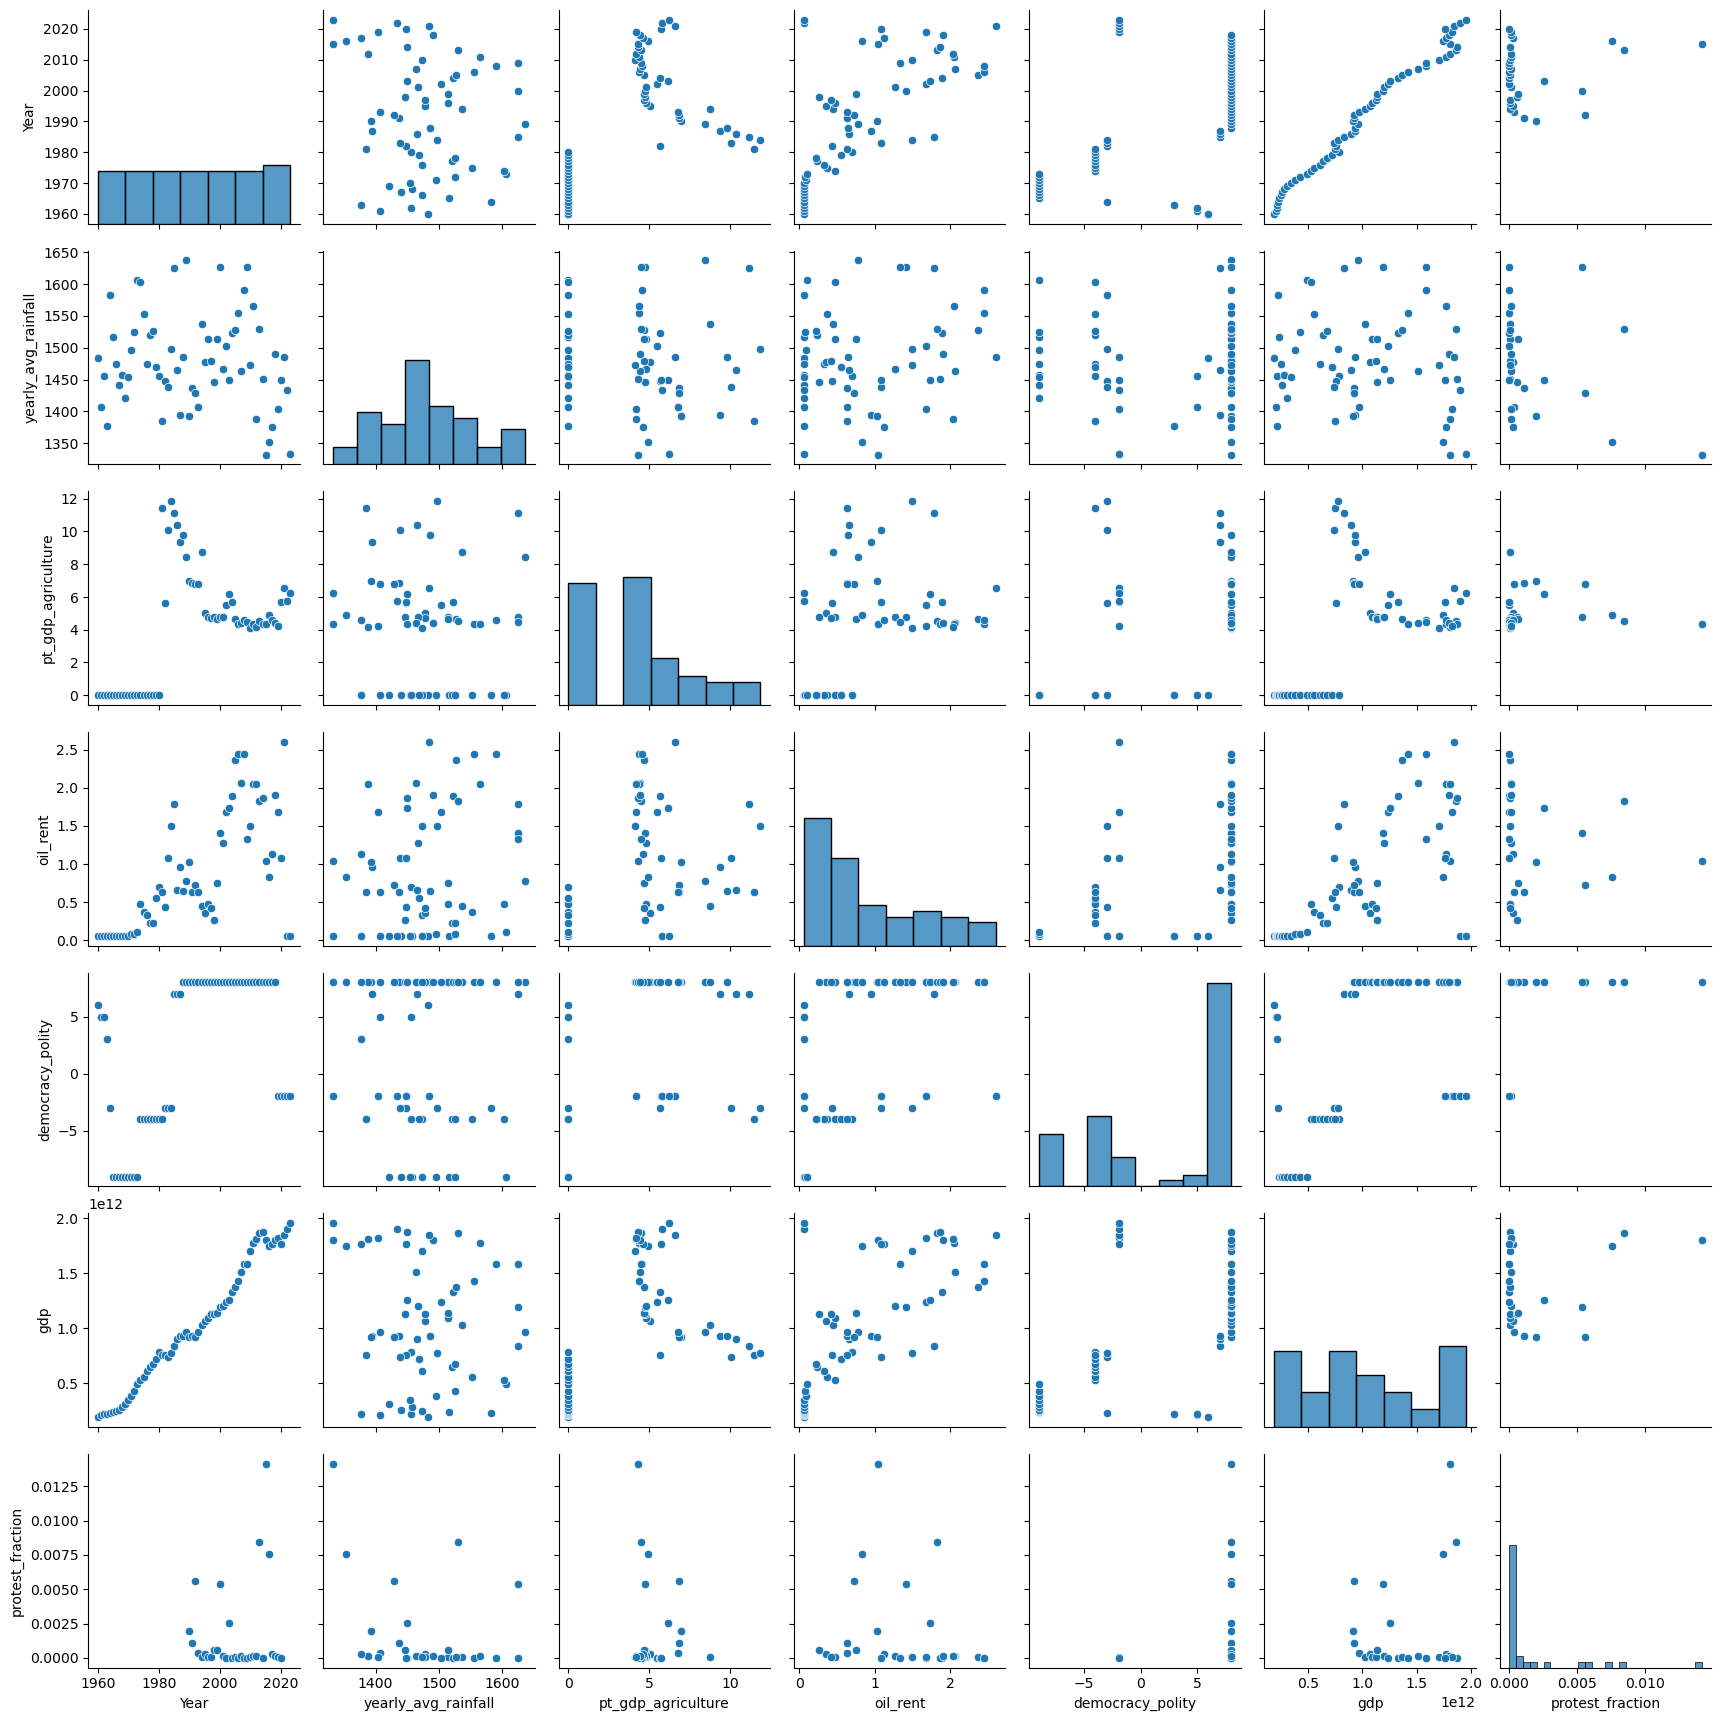

In [27]:
country = fulldf[fulldf['ISO3_code'] == 'BRA']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

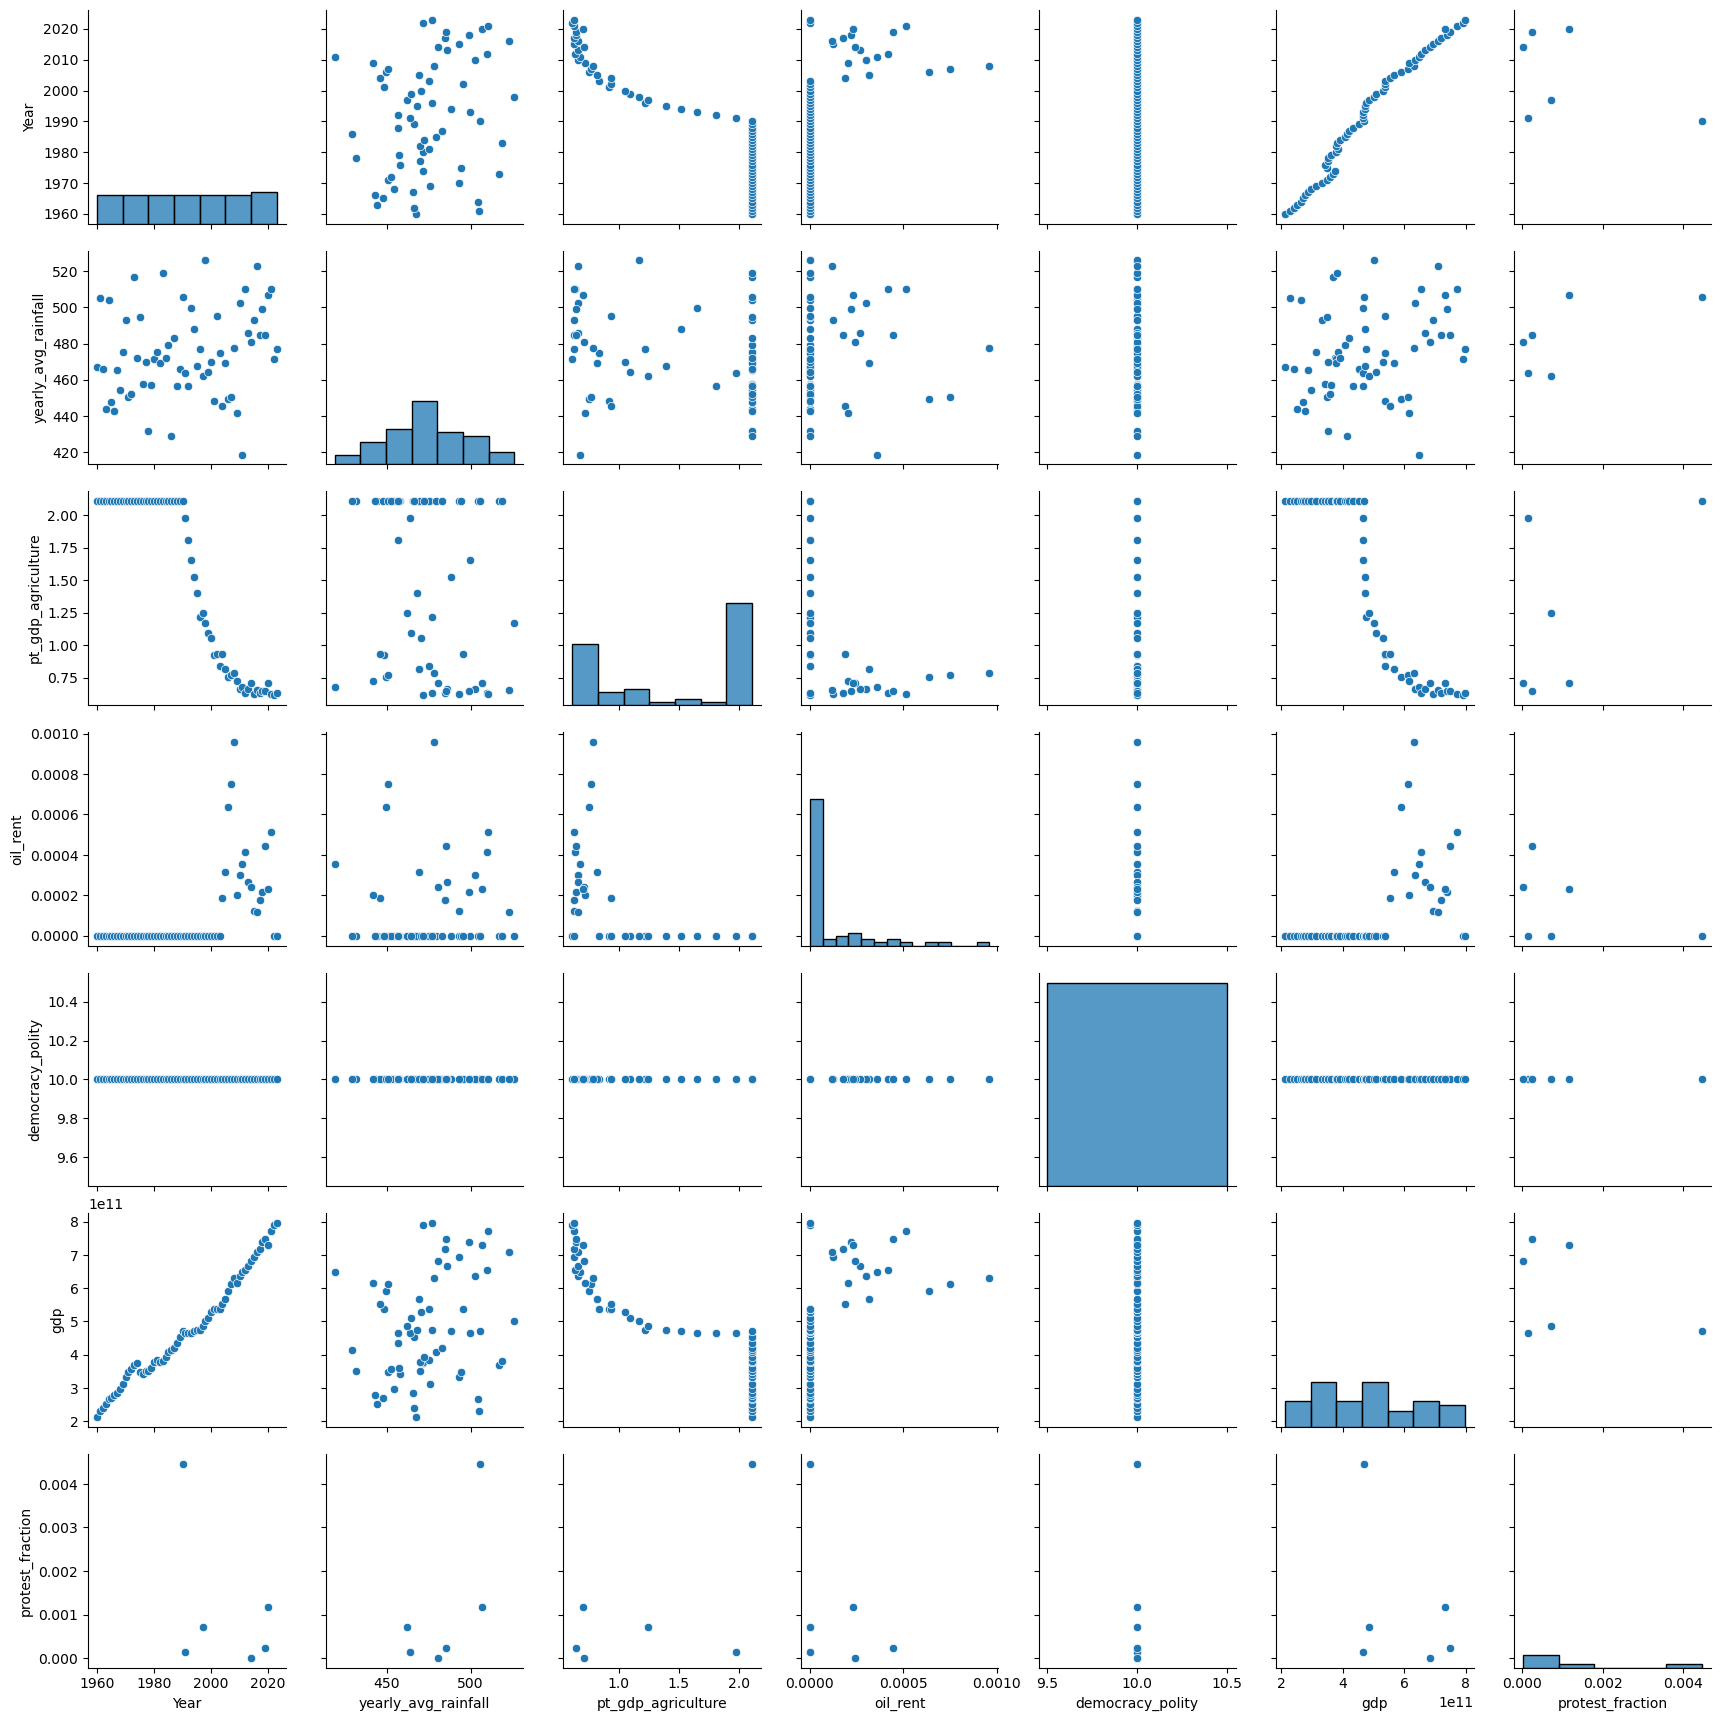

In [28]:
country = fulldf[fulldf['ISO3_code'] == 'CHE']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

In [29]:
fulldf[fulldf['ISO3_code'] == 'CHE']

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,yearly_avg_rainfall,...,gdp_percap,gdp_percap_pchange,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
7898,CHE,1960,2.109859,0.000000,10.0,2.126190e+11,Switzerland,0.230,5.8,467.327264,...,61837.77,NaN,NaN,1.818,NaN,0.330546,NaN,NaN,NaN,NaN
7899,CHE,1961,2.109859,0.000000,10.0,2.298596e+11,Switzerland,0.232,6.7,505.006702,...,61837.77,0.000000,8.108669,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7900,CHE,1962,2.109859,0.000000,10.0,2.408697e+11,Switzerland,0.234,4.8,466.214217,...,61837.77,0.000000,4.789946,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7901,CHE,1963,2.109859,0.000000,10.0,2.526222e+11,Switzerland,0.237,4.9,443.840975,...,61837.77,0.000000,4.879198,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7902,CHE,1964,2.109859,0.000000,10.0,2.659009e+11,Switzerland,0.239,5.9,504.138918,...,61837.77,0.000000,5.256347,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,CHE,2019,0.647746,0.000445,10.0,7.471098e+11,Switzerland,0.367,7.7,484.999498,...,80315.68,0.423089,1.141978,4.394,-6.768513,0.339983,2.586823,8575280.0,2050.0,0.000239
7958,CHE,2020,0.705478,0.000231,10.0,7.311087e+11,Switzerland,0.367,8.1,506.837045,...,78023.34,-2.854162,-2.141733,4.817,9.626764,0.337379,-0.765955,8638167.0,10050.0,0.001163
7959,CHE,2021,0.625932,0.000512,10.0,7.705292e+11,Switzerland,0.367,6.7,510.413959,...,81603.21,4.588204,5.391879,5.097,5.812747,0.330546,-2.025400,NaN,NaN,NaN
7960,CHE,2022,0.614575,0.000000,10.0,7.903189e+11,Switzerland,0.367,8.4,471.604969,...,83007.28,1.720606,2.568331,4.300,-15.636649,0.330546,0.000000,NaN,NaN,NaN


In [30]:
fulldf.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'gdp_percap', 'gdp_percap_pchange', 'gdp_pchange',
       'unemp_rate', 'unemp_rate_pchange', 'gini', 'gini_pchange',
       'population', 'participants', 'protest_fraction'],
      dtype='object')

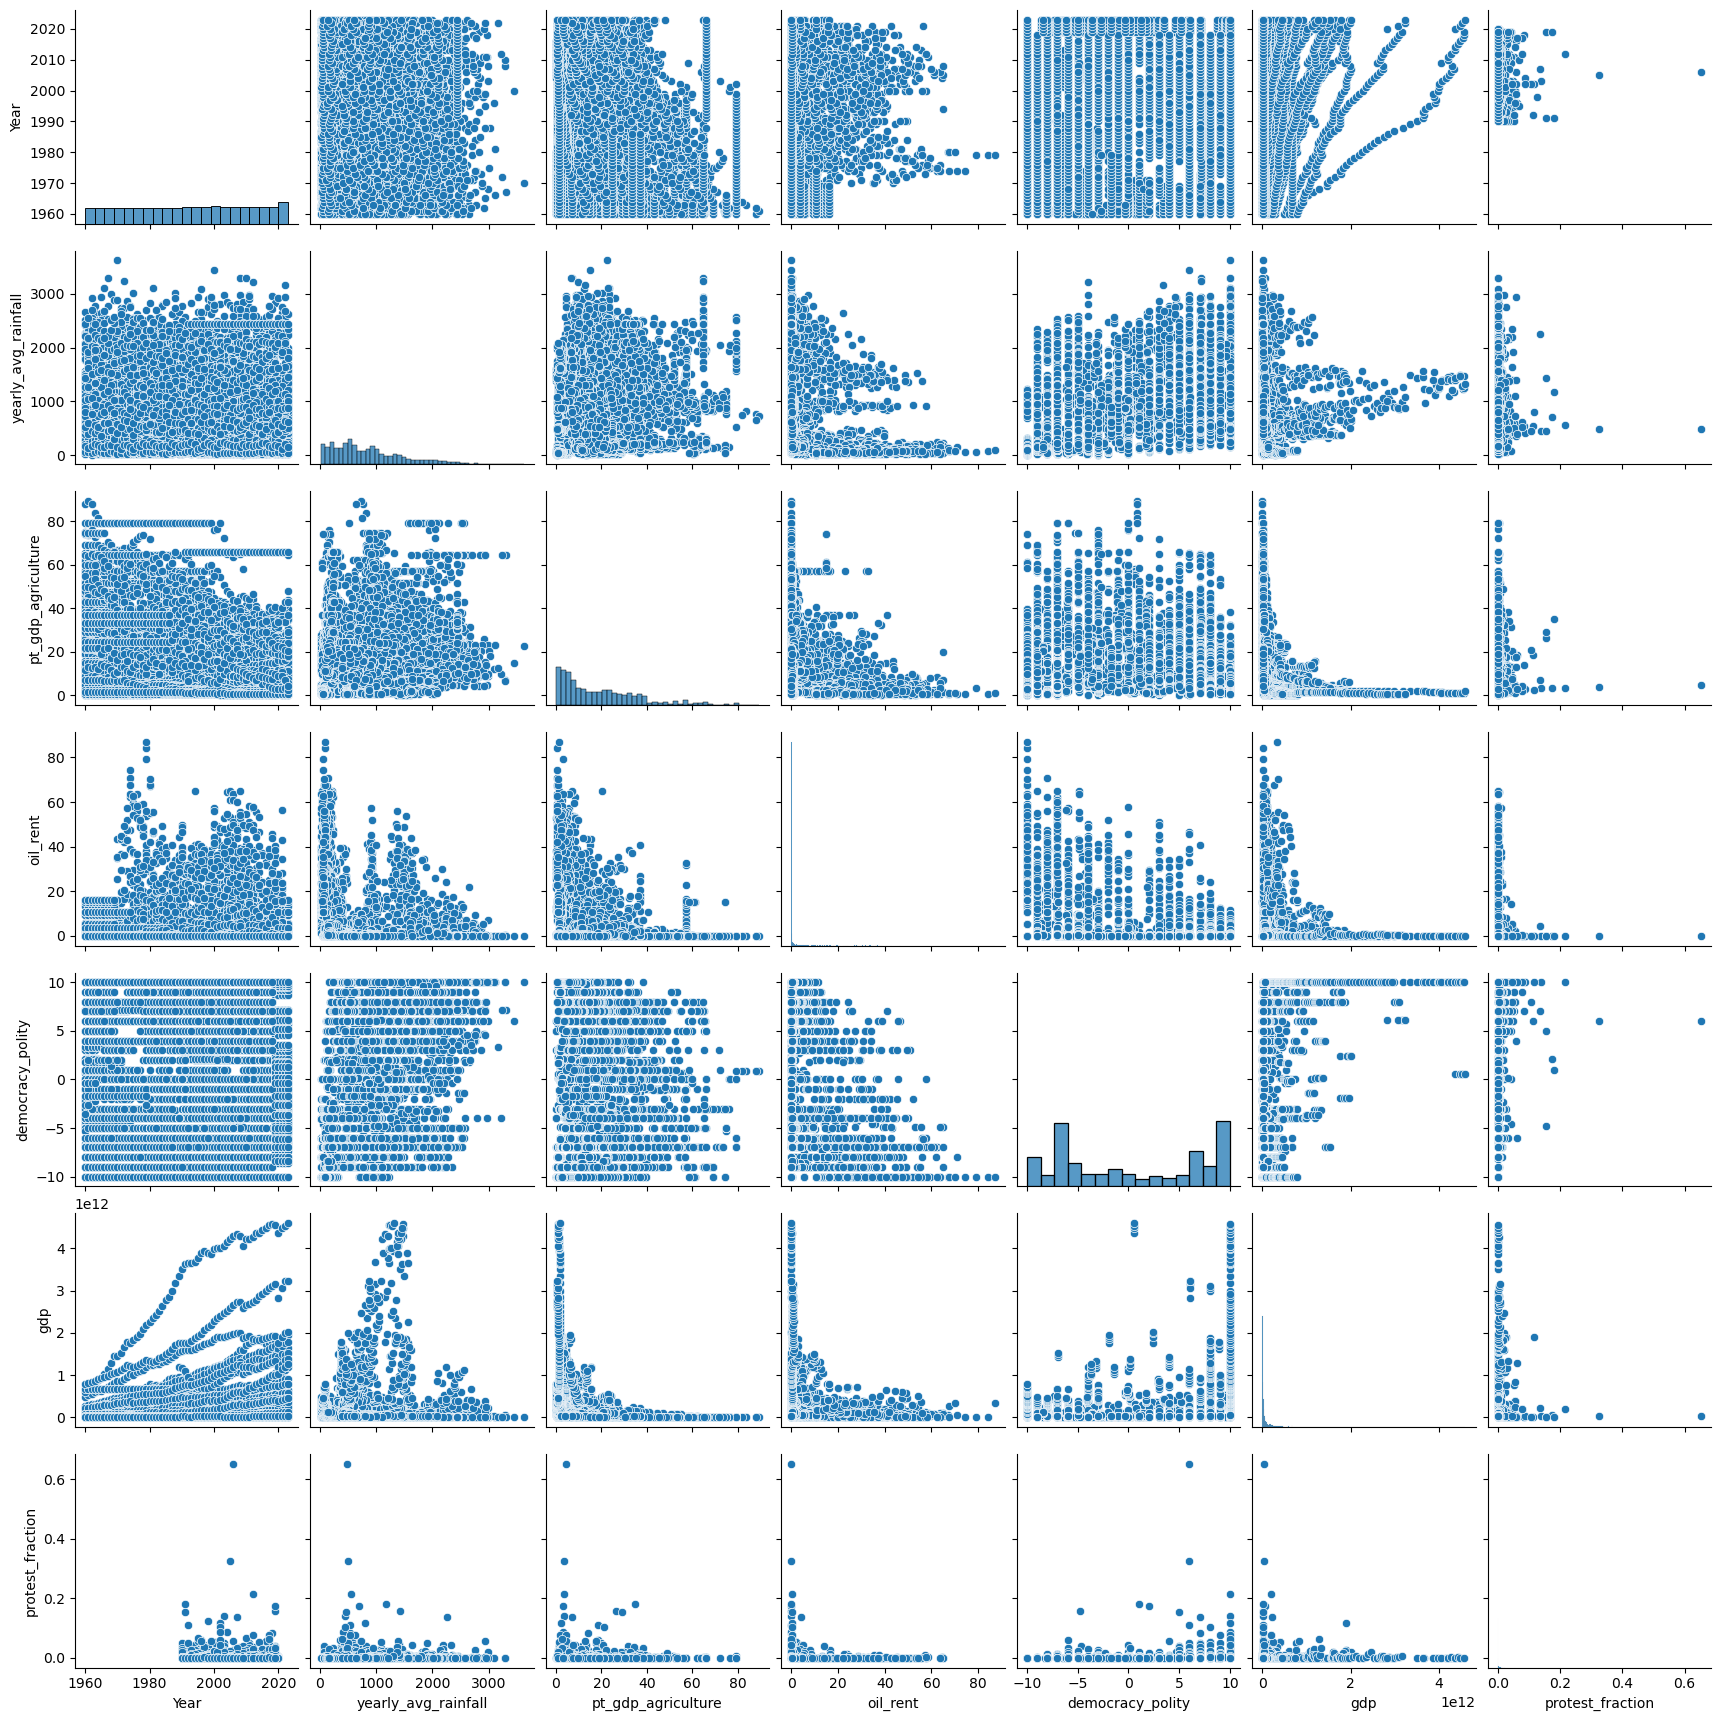

In [31]:
sns.pairplot(fulldf[['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']])